In [21]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score


In [22]:
head = "/home/dhoogla/PhD/clean-ids-collection"
cic_data = {    
    "cicddos2019-DNS": f'{head}/cic-ddos2019/dirty-with-metadata/01_12_DrDoS_DNS.parquet',
    "cicddos2019-LDAP1": f'{head}/cic-ddos2019/dirty-with-metadata/01_12_DrDoS_LDAP.parquet',
    "cicddos2019-MSSQL1": f'{head}/cic-ddos2019/dirty-with-metadata/01_12_DrDoS_MSSQL.parquet',
    "cicddos2019-NETBIOS1": f'{head}/cic-ddos2019/dirty-with-metadata/01_12_DrDoS_NetBIOS.parquet',
    "cicddos2019-NTP": f'{head}/cic-ddos2019/dirty-with-metadata/01_12_DrDoS_NTP.parquet',
    "cicddos2019-SNMP": f'{head}/cic-ddos2019/dirty-with-metadata/01_12_DrDoS_SNMP.parquet',
    "cicddos2019-SSDP": f'{head}/cic-ddos2019/dirty-with-metadata/01_12_DrDoS_SSDP.parquet',
    "cicddos2019-UDP1": f'{head}/cic-ddos2019/dirty-with-metadata/01_12_DrDoS_UDP.parquet',
    "cicddos2019-SYN1": f'{head}/cic-ddos2019/dirty-with-metadata/01_12_Syn.parquet',
    "cicddos2019-TFTP": f'{head}/cic-ddos2019/dirty-with-metadata/01_12_TFTP.parquet',
    "cicddos2019-UDPLAG1": f'{head}/cic-ddos2019/dirty-with-metadata/01_12_UDPLag.parquet',
    "cicddos2019-LDAP2": f'{head}/cic-ddos2019/dirty-with-metadata/03_11_LDAP.parquet',
    "cicddos2019-MSSQL2": f'{head}/cic-ddos2019/dirty-with-metadata/03_11_MSSQL.parquet',
    "cicddos2019-NETBIOS2": f'{head}/cic-ddos2019/dirty-with-metadata/03_11_NetBIOS.parquet',
    "cicddos2019-PORTMAP": f'{head}/cic-ddos2019/dirty-with-metadata/03_11_Portmap.parquet',
    "cicddos2019-SYN2": f'{head}/cic-ddos2019/dirty-with-metadata/03_11_Syn.parquet',
    "cicddos2019-UDPLAG2": f'{head}/cic-ddos2019/dirty-with-metadata/03_11_UDPLag.parquet',
    "cicddos2019-UDP2": f'{head}/cic-ddos2019/dirty-with-metadata/03_11_UDP.parquet',
    "cicddos2019": f'{head}/cic-ddos2019/dirty-with-metadata/cicddos2019.parquet',

    "cicdos2017": f'{head}/cic-dos2017/dirty-with-metadata/cicdos2017.parquet',

    "cicids2017-benign": f'{head}/cic-ids2017/dirty-with-metadata/Benign-Monday-WorkingHours.pcap_ISCX.parquet',
    "cicids2017-botnet": f'{head}/cic-ids2017/dirty-with-metadata/Botnet-Friday-WorkingHours-Morning.pcap_ISCX.parquet',
    "cicids2017-bruteforce": f'{head}/cic-ids2017/dirty-with-metadata/Bruteforce-Tuesday-WorkingHours.pcap_ISCX.parquet',    
    "cicids2017-ddos": f'{head}/cic-ids2017/dirty-with-metadata/DDoS-Friday-WorkingHours-Afternoon.pcap_ISCX.parquet',
    "cicids2017-dos": f'{head}/cic-ids2017/dirty-with-metadata/DoS-Wednesday-WorkingHours.pcap_ISCX.parquet',
    "cicids2017-infiltration": f'{head}/cic-ids2017/dirty-with-metadata/Infiltration-Thursday-WorkingHours-Afternoon.pcap_ISCX.parquet',
    "cicids2017-portscan": f'{head}/cic-ids2017/dirty-with-metadata/Portscan-Friday-WorkingHours-Afternoon.pcap_ISCX.parquet',
    "cicids2017-webattacks": f'{head}/cic-ids2017/dirty-with-metadata/WebAttacks-Thursday-WorkingHours-Morning.pcap_ISCX.parquet',
    "cicids2017": f'{head}/cic-ids2017/dirty-with-metadata/cicids2017.parquet',

    "csecicids2018-botnet": f'{head}/cse-cic-ids2018/dirty-with-metadata/Botnet-Friday-02-03-2018_TrafficForML_CICFlowMeter.parquet',
    "csecicids2018-bruteforce": f'{head}/cse-cic-ids2018/dirty-with-metadata/Bruteforce-Wednesday-14-02-2018_TrafficForML_CICFlowMeter.parquet',    
    "csecicids2018-ddos1": f'{head}/cse-cic-ids2018/dirty-with-metadata/DDoS1-Tuesday-20-02-2018_TrafficForML_CICFlowMeter.parquet',
    "csecicids2018-ddos2": f'{head}/cse-cic-ids2018/dirty-with-metadata/DDoS2-Wednesday-21-02-2018_TrafficForML_CICFlowMeter.parquet',
    "csecicids2018-dos1": f'{head}/cse-cic-ids2018/dirty-with-metadata/DoS1-Thursday-15-02-2018_TrafficForML_CICFlowMeter.parquet',
    "csecicids2018-dos2": f'{head}/cse-cic-ids2018/dirty-with-metadata/DoS2-Friday-16-02-2018_TrafficForML_CICFlowMeter.parquet',
    "csecicids2018-infiltration1": f'{head}/cse-cic-ids2018/dirty-with-metadata/Infil1-Wednesday-28-02-2018_TrafficForML_CICFlowMeter.parquet',
    "csecicids2018-infiltration2": f'{head}/cse-cic-ids2018/dirty-with-metadata/Infil2-Thursday-01-03-2018_TrafficForML_CICFlowMeter.parquet',
    "csecicids2018-webattacks1": f'{head}/cse-cic-ids2018/dirty-with-metadata/Web1-Thursday-22-02-2018_TrafficForML_CICFlowMeter.parquet',
    "csecicids2018-webattacks2": f'{head}/cse-cic-ids2018/dirty-with-metadata/Web2-Friday-23-02-2018_TrafficForML_CICFlowMeter.parquet',
    "csecicids2018": f'{head}/cse-cic-ids2018/dirty-with-metadata/csecicids2018.parquet',
}

In [23]:
dataset = "cicdos2017"
datapaths = [f"{cic_data[dataset]}"]

In [24]:
df = pd.concat(objs=[pd.read_parquet(path) for path in datapaths], ignore_index=True, copy=False, sort=False, verify_integrity=False)

In [25]:
df.columns

Index(['Destination Port', 'Protocol', 'Timestamp', 'Flow Duration',
       'Total Fwd Packets', 'Total Backward Packets',
       'Fwd Packets Length Total', 'Bwd Packets Length Total',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s',
       'Bwd Packets/s', 'Packet Length Min', 'Packet Length Max',
       'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance',
       'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count

In [26]:
df = df[['Destination Port', 'Label']]
df['Label'] = df['Label'].astype(dtype='object')
df['Label'].value_counts()

Benign                   986392
DoS attacks-GoldenEye     41455
DoS attacks-Slowloris     10285
Name: Label, dtype: int64

In [27]:

label_idx = df.columns.size -1
attacks = df.loc[df['Label'] != "Benign"].index
df.iloc[attacks, label_idx] = 1.0
df.iloc[df.index.difference(attacks), label_idx] = 0.0
df['Label'] = df['Label'].astype(dtype='float32', copy=False)
df['Label'].value_counts()

0.0    986392
1.0     51740
Name: Label, dtype: int64

In [28]:
col = df.columns[-1]
cols = df.columns[:-1]
vc = df[col].value_counts()
n = vc.iloc[-1]
m = vc.iloc[0]
initial_cut = df.loc[df[col] == vc.index[0]].sample(n=int(m-n), replace=False)
df = df.drop(index=initial_cut.index)

In [29]:
print(df.shape)
df['Label'].value_counts()

(103480, 2)


0.0    51740
1.0    51740
Name: Label, dtype: int64

In [30]:
gp = df.groupby('Label')
with pd.option_context('display.max_rows', 50):
    print(gp.get_group(0.0)['Destination Port'].value_counts())
    print(gp.get_group(1.0)['Destination Port'].value_counts())

53       17465
80        9701
443       8255
3389      3840
445       2863
         ...  
51350        1
58777        1
52422        1
52392        1
50143        1
Name: Destination Port, Length: 4506, dtype: int64
80    51740
Name: Destination Port, dtype: int64


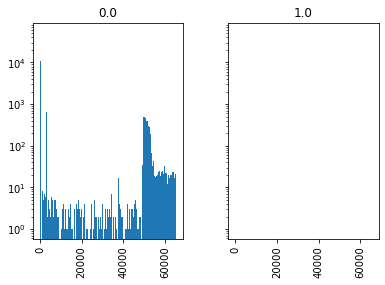

In [31]:
hist = df.hist(column='Destination Port', by='Label', bins=256, log=True, sharey=True, sharex=True)

In [32]:
model = RF()
best_param_dict = {
        'bootstrap': True,
        'max_depth': 3,
        'max_features': 'sqrt',
        'min_impurity_decrease': 0.0,
        'min_samples_leaf': 2,
        'n_estimators': 10,
        'max_samples': 0.5,
        'criterion': 'entropy',
        'n_jobs': -1,
        }
model.set_params(**best_param_dict)

RandomForestClassifier(criterion='entropy', max_depth=3, max_samples=0.5,
                       min_samples_leaf=2, n_estimators=10, n_jobs=-1)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(df['Destination Port'], df['Label'], test_size=0.8, random_state=42)

In [34]:
model.fit(X=X_train.array.reshape(-1,1), y=y_train.array)

RandomForestClassifier(criterion='entropy', max_depth=3, max_samples=0.5,
                       min_samples_leaf=2, n_estimators=10, n_jobs=-1)

In [35]:
intra_outputs = model.predict(X=X_test.array.reshape(-1,1))
intra_acc = accuracy_score(y_true=y_test, y_pred=intra_outputs)
intra_rec = recall_score(y_true=y_test, y_pred=intra_outputs)
intra_pre = precision_score(y_true=y_test, y_pred=intra_outputs)
print(f"{dataset} => Destination Port")
print(f"Accuracy: {intra_acc:.3f}")
print(f"Recall: {intra_rec:.3f}")
print(f"Precision: {intra_pre:.3f}")


csecicids2018-dos1 => Destination Port
Accuracy: 0.907
Recall: 1.000
Precision: 0.842
